In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim


In [135]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Display a few images and their labels

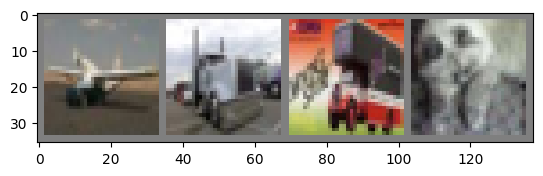

plane truck truck cat  


In [136]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

The CNN


In [222]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # The first convolutional layer has 6 filters of size 3x3
        self.conv1 = nn.Conv2d(3, 180, 3)
        self.bn1 = nn.BatchNorm2d(180)


        # The second convolutional layer has 16 filters of size 3x3
        self.conv2 = nn.Conv2d(180, 90,3)
        self.bn2 = nn.BatchNorm2d(90)

        # The third conv layer 
        self.conv3 = nn.Conv2d(90, 45, 3)
        self.bn3 = nn.BatchNorm2d(45)

        self.conv4 = nn.Conv2d(45, 22, 3)
        self.bn4 = nn.BatchNorm2d(22)

        
        self.conv5 = nn.Conv2d(22, 16, 3)
        self.bn5 = nn.BatchNorm2d(16)



        # The first fully connected layer has 120 neurons
        self.fc1 = nn.Linear(16 * 22 * 22, 120)
        self.bn6 = nn.BatchNorm1d(120)


        # The third fully connected layer has 10 neurons, one for each class
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):

      x = self.bn1(F.relu(self.conv1(x)))
      x = self.bn2(F.relu(self.conv2(x)))
      x = self.bn3(F.relu(self.conv3(x)))
      x = self.bn4(F.relu(self.conv4(x)))
      x = self.bn5(F.relu(self.conv5(x)))
      x = torch.flatten(x, 1)
      x = self.bn6( F.relu(self.fc1(x)))
      x = self.fc3(x)

      return x


In [223]:
device= "cuda"

In [224]:
from torchsummary import summary
net2 = Net()
summary(net2.to(device),(3,32,32))
print(net2)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 180, 30, 30]           5,040
       BatchNorm2d-2          [-1, 180, 30, 30]             360
            Conv2d-3           [-1, 90, 28, 28]         145,890
       BatchNorm2d-4           [-1, 90, 28, 28]             180
            Conv2d-5           [-1, 45, 26, 26]          36,495
       BatchNorm2d-6           [-1, 45, 26, 26]              90
            Conv2d-7           [-1, 22, 24, 24]           8,932
       BatchNorm2d-8           [-1, 22, 24, 24]              44
            Conv2d-9           [-1, 16, 22, 22]           3,184
      BatchNorm2d-10           [-1, 16, 22, 22]              32
           Linear-11                  [-1, 120]         929,400
      BatchNorm1d-12                  [-1, 120]             240
           Linear-13                   [-1, 10]           1,210
Total params: 1,131,097
Trainable param

Training

[1,   100] loss: 0.472
[1,   200] loss: 0.434
[1,   300] loss: 0.444
[1,   400] loss: 0.428
[1,   500] loss: 0.438
[1,   600] loss: 0.428
[1,   700] loss: 0.441
[1,   800] loss: 0.420
[1,   900] loss: 0.448
[1,  1000] loss: 0.433
[1,  1100] loss: 0.435
[1,  1200] loss: 0.428
[1,  1300] loss: 0.440
[1,  1400] loss: 0.433
[1,  1500] loss: 0.426
[1,  1600] loss: 0.433
[1,  1700] loss: 0.433
[1,  1800] loss: 0.425
[1,  1900] loss: 0.428
[1,  2000] loss: 0.429
[1,  2100] loss: 0.416
[1,  2200] loss: 0.409
[1,  2300] loss: 0.416
[1,  2400] loss: 0.413
[1,  2500] loss: 0.425
[1,  2600] loss: 0.423
[1,  2700] loss: 0.412
[1,  2800] loss: 0.424
[1,  2900] loss: 0.422
[1,  3000] loss: 0.426
[1,  3100] loss: 0.423
[1,  3200] loss: 0.415
[1,  3300] loss: 0.407
[1,  3400] loss: 0.399
[1,  3500] loss: 0.408
[1,  3600] loss: 0.395
[1,  3700] loss: 0.407
[1,  3800] loss: 0.401
[1,  3900] loss: 0.454
[1,  4000] loss: 0.417
[1,  4100] loss: 0.416
[1,  4200] loss: 0.415
[1,  4300] loss: 0.414
[1,  4400] 

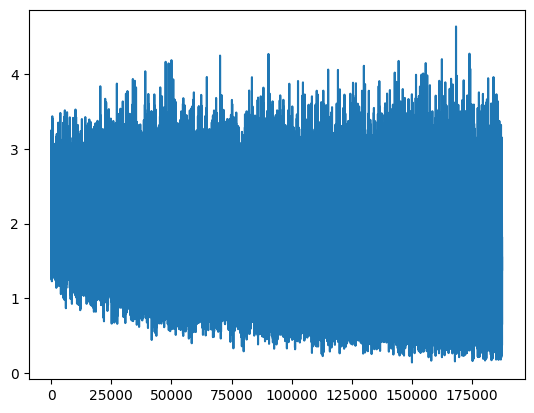

In [225]:
net = Net().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
ls = []
num_epochs = 15

for epoch in range(num_epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.to(device))
        loss = loss_fn(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        ls.append(loss.item())


        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 500:.3f}')
            running_loss = 0.0
  
plt.plot(ls)
print('Finished Training')

Accuarcay the network on the test set

In [227]:
net.eval()
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images.to(device))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f'Accuracy of the CNN network after batch normaliazation it was 61% now its: {100 * correct // total} %')

Accuracy of the CNN network after batch normaliazation it was 61% now its: 58 %
